# File Handling

* File handling is a good way to persist data after a program terminates. 

* Data from a computer program is saved to a file and can be accessed later. 

* Python, like many other programming languages, provides handy methods for creating, opening, reading and writing data to a file.

* In Python you can open nearly any type of file.

## Where are files located?

* Files are located on physical non-volatile memory (e.g., spinning disk, solid-state flash, NVMe)

* Files are mounted via a filesystem and are organized hierarchically

![](images/FileSystems.png)

## Browsing the filesystem from Python

* Python has tools to browse the filesystem and modify and write files

* Python provides the `pathlib` module for  navigating through directories and files, creating folders, identifying file paths, and so on.

In [1]:
from pathlib import Path

### Getting the current working directory

* This is the path where you are currently operating in

In [2]:
p = Path.cwd()
print(p)

/mnt/c/Users/jca92/Documents/codes/Winter_2023_ENGR_131_private/jupyterbook/week6/lecture6


### Specifying Paths

There are two ways to specify paths:

1. The **absolute** path of a file declares its path, beginning with the root folder

In [3]:
# This will join the current working directory and the test file
print(Path.joinpath(Path.cwd(),"MyTestFile.txt"))

# Checks if the file exists
print(f"If True the file exists : {Path.exists(Path.joinpath(Path.cwd(),'MyTestFile.txt'))}")

/mnt/c/Users/jca92/Documents/codes/Winter_2023_ENGR_131_private/jupyterbook/week6/lecture6/MyTestFile.txt
If True the file exists : True


2. The **relative** path of a file declares its path in relation to the current working directory

In [4]:
# This will join the current working directory and the test file
print(Path("./MyTestFile.txt"))

# Checks if the file exists
# Note you have to convert the string to a path
print(f"If True the file exists : {Path.exists(Path('./MyTestFile.txt'))}")

MyTestFile.txt
If True the file exists : True


### Making folders

You can make folders or directories with Python

In [5]:
# creates a path object
p = Path('./new_made_folder')

# makes the folder
p.mkdir()

### How to change your current working directory

You can use the `os.chdir` method

Let's move to the new folder we created

In [6]:
import os

os.chdir("./new_made_folder/")

In [7]:
print(Path.cwd())

/mnt/c/Users/jca92/Documents/codes/Winter_2023_ENGR_131_private/jupyterbook/week6/lecture6/new_made_folder


You can move back one folder using the ".." path

In [8]:
os.chdir("..")

In [9]:
print(Path.cwd())

/mnt/c/Users/jca92/Documents/codes/Winter_2023_ENGR_131_private/jupyterbook/week6/lecture6


```{Note}
Very similar commands will work from the command line. You can change directories using `cd`, and list contents of the current directory using `ls`.
```

### Removing a directory

It is possible to remove a directory using the `.rmdir()` method on a path object. 

In [10]:
p.rmdir()

### Listing files in a directory

You can list files in a directory using the `.listdir()` method

In [11]:
path = '.'
p = Path(path)
p.iterdir()

<generator object Path.iterdir at 0x7fefc6025a10>

This created an object called a generator. Generators can be iterated through using loops

In [12]:
for file in p.iterdir():
    print(file)

.ipynb_checkpoints
Activity_3_Determining_the_superbowl_winner.ipynb
Activity_3_Determining_the_superbowl_winner_solutions.ipynb
file_handling.ipynb
images
Metro_Interstate_Traffic_Volume.csv
Metro_Interstate_Traffic_Volume.xls
MyTestFile copy.txt
MyTestFile.txt
Super Bowl Propositions.xlsx


## Reading and Writing Data

There are different access modes for reading and writing files in python

* `r`: opens a file for reading. The read mode throws an error when the file doesn’t exist.

* `r+`: opens the file to read and write data into a file object. An error is thrown if the file doesn’t exist.

* `w`: a file is opened in this mode for writing data. The write mode overrides existing data and creates a new file object if it doesn’t exist.

* `w+`: opens a file to read and write data. Existing data on file is overridden when opened in this mode.

* `a`: the append mode appends to a file if the file exists. It also creates a new file if there’s no existing file. It doesn’t override existing data.

* `a+`: this mode opens a file for appending and reading data.

* `x`: the create mode is used to create files in Python. An error is thrown if the file exists.

### Opening files in Python

To open a file in Python, we can use the `open()` function. 

* It takes at least two arguments — the filename, and the mode description — and returns a file object

In [13]:
f = open("./MyTestFile.txt", 'r')

### Reading files

You can read the file object using the `.read()` method. This returns all characters.

In [14]:
f.read()

'This is my test file\nThis is the second line of my test file\nThis is the last line of my test file'

Note:

* The read automatically adds line breaks \n but since we did not interpret the string it displays the text
* We cannot read a file twice, once it read to the end you need to open the file to start over

In [15]:
f.read()

''

In [16]:
f = open("./MyTestFile.txt", 'r')
print(f.read())

This is my test file
This is the second line of my test file
This is the last line of my test file


### Reading a line

The `.readline()` method allows you to read one line of a file a time. 

In [17]:
f = open("./MyTestFile.txt", 'r')
for i in range(3):
    print(f.readline())

This is my test file

This is the second line of my test file

This is the last line of my test file


### Reading all lines

The `.readlines()` method returns all lines in a file as a list

In [18]:
f = open("./MyTestFile.txt", 'r')

for i, line in enumerate(f.readlines()):
    print(f"line {i} is: {line}")

line 0 is: This is my test file

line 1 is: This is the second line of my test file

line 2 is: This is the last line of my test file


### Closing Files

Files like kitchen cabinets do not close themselves. If you don't close a file it runs the risk of it being corrupted. 

To close a file use the `.close()` method

In [19]:
f.close()

## The `with` Statement

Since it is so easy to forget to close a file it is best practice to use the `with`. `with` automatically closes a file after the last operation in a scope (i.e., what is indented) is complete.

### Syntax

```python
with open("filename", "mode") as local_object:
    local_object.do_something()
```

In [20]:
with open("./MyTestFile.txt", 'r') as f:
    for i, line in enumerate(f.readlines()):
        print(f"line {i} is: {line}")

line 0 is: This is my test file

line 1 is: This is the second line of my test file

line 2 is: This is the last line of my test file


## Writing to a file

When writing to a file it is best practice to use the `with` statement.

### Appending to a file

In [21]:
with open("./MyTestFile.txt", 'a+') as f:
    # we need to add the new line character
    f.write('\n manual added line')

Since we are going to read and print the file many times let's make a function

In [22]:
def read(file):
    f = open(file, 'r')

    for i, line in enumerate(f.readlines()):
        print(f"line {i} is: {line}")

In [23]:
read("./MyTestFile.txt")

line 0 is: This is my test file

line 1 is: This is the second line of my test file

line 2 is: This is the last line of my test file

line 3 is:  manual added line


### Writing multiple lines at once with `.writelines()` method

`.writelines()` adds a list to a file

In [24]:
list_ = ['\n added line as list 1', '\n added line as list 2']

with open("./MyTestFile.txt", 'a+') as f:
    # we need to add the new line character
    f.writelines(list_)

In [25]:
read("./MyTestFile.txt")

line 0 is: This is my test file

line 1 is: This is the second line of my test file

line 2 is: This is the last line of my test file

line 3 is:  manual added line

line 4 is:  added line as list 1

line 5 is:  added line as list 2


**What happens when we change `a+` to `w`**

In [26]:
list_ = ['added line as list 1', '\n added line as list 2']

with open("./MyTestFile.txt", 'w') as f:
    # we need to add the new line character
    f.writelines(list_)

In [27]:
read("./MyTestFile.txt")

line 0 is: added line as list 1

line 1 is:  added line as list 2


We overwrote the file. Good thing we have a copy. Let's delete the modified file and replace it with our backup copy.

### Deleting the file

In [28]:
p = Path('./MyTestFile.txt')

p.unlink()

### Copying the file using `shutil.copyfile()`

In [29]:
import shutil

shutil.copyfile('./MyTestFile copy.txt', './MyTestFile.txt')

'./MyTestFile.txt'

## Opening Common File Formats

`.txt` files are great because of their simplicity and interoperability sometimes data is stored in more complex structures. Python provides tools to open nearly any file format ever created. We will introduce opening some common file formats.

### Comma Separated Variables

* Many system monitoring and manufacturing sensors record several variables at a single time. These are commonly stored as comma separated variable 

If you were a city planner you might be interested in understanding traffic patterns depending on several factors. 

In [30]:
import csv

# opens the file
with open('Metro_Interstate_Traffic_Volume.csv', 'r') as f:
    
    # csv reader
    csv_reader = csv.reader(f, delimiter=',')
    
    # number of lines counted
    line_count = 0
    
    # makes a list
    values_ = []
    
    # loops around the number of rows
    for row in csv_reader:
        
        # if on the first row saves the data as a header
        if line_count == 0:
            headers = row
            line_count += 1
        else:
            # else will append the values
            values_.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Processed 48205 lines.


In [31]:
print(headers)
print(values_[0])

['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume']
['None', '288.28', '0.0', '0.0', '40', 'Clouds', 'scattered clouds', '2012-10-02 09:00:00', '5545']


### Loading an Excel File

There are more developed tools that can deal with more complex data structures, and have more elaborate built it methods.

One package is called Pandas

In [32]:
!pip install xlrd

In [33]:
import pandas as pd

df = pd.read_excel("Metro_Interstate_Traffic_Volume.xls")

Pandas DataFrames have many functions:

In [34]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Getting the max value

In [35]:
df['rain_1h'].max()

9831.3

Getting the Unique Values

In [36]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

Multilevel indexing

In [37]:
df[df['rain_1h']>10]['traffic_volume']

7033     4271
7034     4271
7035     4271
7133      635
7134      635
         ... 
26789    2086
47929    2957
47930    2957
47931    2957
47932    2957
Name: traffic_volume, Length: 94, dtype: int64

Even plotting

<AxesSubplot: >

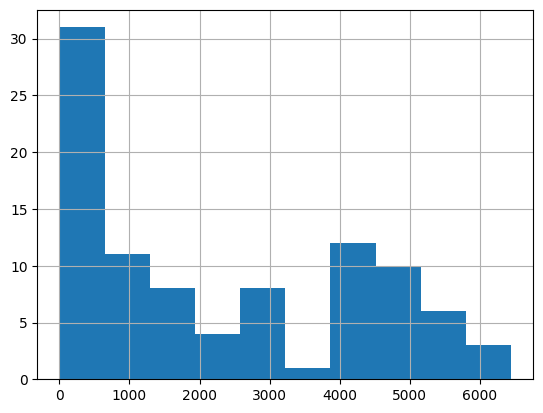

In [38]:
df[df['rain_1h']>10]['traffic_volume'].hist()